# Самостоятельный проект - 2

По заданию крупного интернет-магазина нужно вместе с отделом маркетинга приоритизировать гипотезы для увеличения выручки из подготовленного списка, запустить A/B-тест и проанализировать результаты.

## <a name="1"></a>Задачи

* Определить приорететные гепотезы для развития.
* Провести А/В-тестирование и объясните результаты.
* Выбрать вариант решений:
  1. Остановить тест, зафиксировать победу одной из групп.
  2. Остановить тест, зафиксировать отсутствие различий между группами.
  3. Продолжить тест.

## <a name="2"></a>Содержание
[Задачи](#1)<br>
[Содержание](#2)<br>
[Описание данных](#3)<br>
[Настройка окружения](#4)<br>
[Загрузка данных](#5)<br>
[Предобработка данных](#6)<br>
[Часть 1. Приоритизация гипотез](#7)<br>
- [Промежуточный вывод о приоритизации гипотез при применении RICE вместо ICE](#7_1)<br>

[Часть 2. Анализ A/B-теста](#8)<br>
- [График кумулятивной выручки по группам](#8_1)<br>
- [График кумулятивного среднего чека по группам](#8_2)<br>
- [График относительного изменения кумулятивного среднего чека группы B к группе A](#8_3)<br>
- [График кумулятивного среднего количества заказов на посетителя по группам](#8_4)<br>
- [График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A](#8_5)<br>
- [График количества заказов по пользователям](#8_6)<br>
- [Расчёт 95-го и 99-го перцентилей количества заказов на пользователя](#8_7)<br>
- [График стоимостей заказов](#8_8)<br>
- [Расчёт 95-го и 99-го перцентилей стоимости заказов](#8_9)<br>
- [Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным](#8_10)<br>
- [Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным](#8_11)<br>
- [Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным](#8_12)<br>
- [Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным](#8_13)<br>
- [Промежуточный вывод](#8_14)<br>

[Общие выводы](#9)

## <a name="3"></a>Описание данных
[К содержанию](#2)<br><br>
Данные для первой части<br>
Файл _/datasets/hypothesis.csv_
* Hypothesis — краткое описание гипотезы;
* Reach — охват пользователей по 10-балльной шкале;
* Impact — влияние на пользователей по 10-балльной шкале;
* Confidence — уверенность в гипотезе по 10-балльной шкале;
* Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

Данные для второй части<br>
_Файл /datasets/orders.csv_
* transactionId — идентификатор заказа;
* visitorId — идентификатор пользователя, совершившего заказ;
* date — дата, когда был совершён заказ;
* revenue — выручка заказа;
* group — группа A/B-теста, в которую попал заказ.

Файл _/datasets/visitors.csv_
* date — дата;
* group — группа A/B-теста;
* visitors — количество пользователей в указанную дату в указанной группе A/B-теста


## <a name="4"></a>Настройка окружения
[К содержанию](#2)

In [1]:
# Импорт библиотек и настройка работы
import pandas as pd # таблицы
pd.set_option('display.float_format', '{:.1f}'.format)
pd.options.display.float_format = '{:.1f}'.format # не нужен нам частокол после запятой
import numpy as np # математика
from scipy import stats as st # статистика
import copy # копирование значений в новый объкект через deepcopy, а не ссылок на старый объект
#import seaborn as sns # визуализация в графиках
import datetime as dt # даты и время
from datetime import timedelta # для расчёта продолжительности, разницы между двумя датами или временем
import matplotlib # визуализация, настройки дальше
#import plotly.express as px
#from statsmodels.graphics.gofplots import qqplot
import matplotlib.pyplot as plt # запускать ячейки надо подряд, а не все сразу
from matplotlib import pyplot as plt # для автоматического создания  в графиках осей и других компонентов
from matplotlib import rcParams, rcParamsDefault # установим параметры графиков
# нормальное отображение графиков plt
rcParams['figure.figsize'] = 12, 9 # размер графиков с соотношением сторон почти 4:3
rcParams['figure.dpi'] = 100 # возьмём 100 точек для разрешения по умолчанию, вроде чётко (увеличивая, можно сделать чётче и ярче)
rcParams['font.style'] = 'normal' # нормальный шрифт
rcParams['font.size'] = 10 # шрифт 10 кегля
rcParams['axes.titlesize'] = 12 # Размер шрифта в названии графика
rcParams['axes.titleweight'] = 'bold' # Выделим название
rcParams['axes.grid'] = True # отобразим сетку
rcParams['grid.linewidth'] = 1 # толщина
rcParams['grid.color'] = '#A5A5A5' # цвет
rcParams['axes.axisbelow'] = True # положим сетку под графиком
%config InlineBackend.figure_format = 'svg' # можно и в png, но в svg более чёткое изображенние и масштабируется на разных экранах
import warnings
warnings.filterwarnings('ignore')

## <a name="5"></a>Загрузка данных
[К содержанию](#2)

In [2]:
try:
    hypot = pd.read_csv('hypothesis.csv')
    order = pd.read_csv('orders.csv')
    visit = pd.read_csv('visitors.csv')
except:
    hypot = pd.read_csv('/datasets/hypothesis.csv')
    order = pd.read_csv('/datasets/orders.csv')
    visit = pd.read_csv('/datasets/visitors.csv')

## <a name="6"></a>Предобработка данных
[К содержанию](#2)

In [3]:
# функция получения полной информации о датафрейме
def data_info (data):
    print('\nПервые 10 строк:\n')
    display(data.head(10))
    print('\nПоследние 10 строк:\n')
    display(data.tail(10))
    print('\nТипы данных:\n')
    display(data.info(memory_usage='deep'))
    print('\nПолное статистическое описание:\n')
    display(data.describe(include = "all"))
    print('\nКатегориальные признаки:\n')
    display(data.describe(include=[object]))
    print('\nПропуски:\n')
    for i in data.columns:
        if data[i].isna().sum() > 0: 
            print(i, ' - ', data[i].isna().sum(), 'пропусков\n') 
            count = +1
#        if count == 0:
        else:
            print('Пропусков НЕТ\n')
    print('\nОбъём пропусков от всех данных:')
    display(data.isna().mean().sort_values(ascending=False)*100)
    print('\nДубликаты:\n')
    if data.duplicated().sum() > 0:
        print('Дубликатов: ', data.duplicated().sum())
    else:
        print('Дубликатов НЕТ')

In [4]:
# информация о таблице с гипотезами
data_info(hypot)


Первые 10 строк:



,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5



Последние 10 строк:



,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5



Типы данных:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 2.7 KB


None


Полное статистическое описание:



,Hypothesis,Reach,Impact,Confidence,Efforts
count,9,9.0,9.0,9.0,9.0
unique,9,NaN,NaN,NaN,NaN
top,"Изменить цвет фона главной страницы, чтобы уве...",NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN
mean,NaN,4.8,4.8,5.6,4.9
std,NaN,3.2,3.2,3.0,2.8
min,NaN,1.0,1.0,1.0,1.0
25%,NaN,3.0,3.0,3.0,3.0
50%,NaN,3.0,3.0,7.0,5.0
75%,NaN,8.0,7.0,8.0,6.0



Категориальные признаки:



,Hypothesis
count,9
unique,9
top,"Изменить цвет фона главной страницы, чтобы уве..."
freq,1



Пропуски:

Пропусков НЕТ

Пропусков НЕТ

Пропусков НЕТ

Пропусков НЕТ

Пропусков НЕТ


Объём пропусков от всех данных:


Hypothesis   0.0
Reach        0.0
Impact       0.0
Confidence   0.0
Efforts      0.0
dtype: float64


Дубликаты:

Дубликатов НЕТ


В таблице с гипотезами всего 9 строк, но нужно изменить названия колонок и типы данных:<br>
__Hypothesis__ - текстовый оставляем в object;<br>
__Reach__ - целое число в uint8;<br>
__Impact__ - тоже самое в uint8;<br>
__Confidence__ - также число в uint8;<br>
__Efforts__ - в uint8.<br>

In [5]:
# Приведём названия столбцов к нижнему регистру и змеиному стилю
hypot.columns = [name.lower().replace(' ', '_') for name in hypot.columns]
# Изменим тип данных
hypot.reach = hypot.reach.astype('uint8')
hypot.impact = hypot.impact.astype('uint8')
hypot.confidence = hypot.confidence.astype('uint8')
hypot.efforts = hypot.efforts.astype('uint8')
hypot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   hypothesis  9 non-null      object
 1   reach       9 non-null      uint8 
 2   impact      9 non-null      uint8 
 3   confidence  9 non-null      uint8 
 4   efforts     9 non-null      uint8 
dtypes: object(1), uint8(4)
memory usage: 236.0+ bytes


In [6]:
# информация о таблице с заказами
data_info(order)


Первые 10 строк:



,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
6,398296753,2900797465,2019-08-15,1860,B
7,2626614568,78758296,2019-08-15,1044,A
8,1576988021,295230930,2019-08-15,13710,A
9,1506739906,1882260405,2019-08-15,1855,B



Последние 10 строк:



,transactionId,visitorId,date,revenue,group
1187,2274188238,132143192,2019-08-14,750,A
1188,1692103379,1022829655,2019-08-14,112,A
1189,4082620617,393266494,2019-08-14,31550,B
1190,38478481,1197745035,2019-08-14,8600,B
1191,3592955527,608641596,2019-08-14,16490,B
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A
1196,3936777065,2108080724,2019-08-15,202740,B



Типы данных:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 174.3 KB


None


Полное статистическое описание:



,transactionId,visitorId,date,revenue,group
count,1197.0,1197.0,1197,1197.0,1197
unique,NaN,NaN,31,NaN,2
top,NaN,NaN,2019-08-05,NaN,B
freq,NaN,NaN,48,NaN,640
mean,2155621385.5,2165960143.1,NaN,8348.0,NaN
std,1229084904.8,1236014192.1,NaN,39191.1,NaN
min,1062393.0,5114589.0,NaN,50.0,NaN
25%,1166775572.0,1111826046.0,NaN,1220.0,NaN
50%,2145193898.0,2217984702.0,NaN,2978.0,NaN
75%,3237740112.0,3177606451.0,NaN,8290.0,NaN



Категориальные признаки:



,date,group
count,1197,1197
unique,31,2
top,2019-08-05,B
freq,48,640



Пропуски:

Пропусков НЕТ

Пропусков НЕТ

Пропусков НЕТ

Пропусков НЕТ

Пропусков НЕТ


Объём пропусков от всех данных:


transactionId   0.0
visitorId       0.0
date            0.0
revenue         0.0
group           0.0
dtype: float64


Дубликаты:

Дубликатов НЕТ


В таблице с заказами тоже нужно изменить названия колонок и типы данных:<br>
__transactionId__ - целое положительное число в uint64;<br>
__visitorId__ - целое положительное в uint64;<br>
__date__ - дата и время в datetime64;<br>
__revenue__ - целое положительное в uint64;<br>
__group__ - два значения можно в bool.

In [7]:
# Приведём названия столбцов к нижнему регистру и змеиному стилю
order.columns = [name.lower().replace(' ', '_') for name in order.columns]
order.rename(columns = {'transactionid':'transaction_id', 'visitorid':'visitor_id'}, inplace = True )
# Изменим тип данных
order.transaction_id = order.transaction_id.astype('uint64')
order.visitor_id = order.visitor_id.astype('uint64')
order.date = pd.to_datetime(order.date)
order.revenue = order.revenue.astype('float')
#order.group = order.group.replace({"A" : True, "B" : False})
order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  1197 non-null   uint64        
 1   visitor_id      1197 non-null   uint64        
 2   date            1197 non-null   datetime64[ns]
 3   revenue         1197 non-null   float64       
 4   group           1197 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(1), uint64(2)
memory usage: 46.9+ KB


In [8]:
print('Минимальная и максимальная дата:\n')
print(order['date'].min())
print(order['date'].max())

Минимальная и максимальная дата:

2019-08-01 00:00:00
2019-08-31 00:00:00


In [9]:
# информация о таблице с пользователями
data_info(visit)


Первые 10 строк:



,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
5,2019-08-06,A,667
6,2019-08-07,A,644
7,2019-08-08,A,610
8,2019-08-09,A,617
9,2019-08-10,A,406



Последние 10 строк:



,date,group,visitors
52,2019-08-22,B,650
53,2019-08-23,B,546
54,2019-08-24,B,378
55,2019-08-25,B,679
56,2019-08-26,B,676
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490
61,2019-08-31,B,718



Типы данных:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 8.2 KB


None


Полное статистическое описание:



,date,group,visitors
count,62,62,62.0
unique,31,2,NaN
top,2019-08-31,A,NaN
freq,2,31,NaN
mean,NaN,NaN,607.3
std,NaN,NaN,114.4
min,NaN,NaN,361.0
25%,NaN,NaN,534.0
50%,NaN,NaN,624.5
75%,NaN,NaN,710.5



Категориальные признаки:



,date,group
count,62,62
unique,31,2
top,2019-08-31,A
freq,2,31



Пропуски:

Пропусков НЕТ

Пропусков НЕТ

Пропусков НЕТ


Объём пропусков от всех данных:


date       0.0
group      0.0
visitors   0.0
dtype: float64


Дубликаты:

Дубликатов НЕТ


В таблице с пользователями названия колонок в порядке, но типы данных нужно изменить:<br>
__date__ - дата и время в datetime64;<br>
__group__ - два значения можно в bool;<br>
__visitors__ - целое положительное число в uint64.

In [10]:
# Приведём названия столбцов к нижнему регистру и змеиному стилю
visit.columns = [name.lower().replace(' ', '_') for name in visit.columns]
# Изменим тип данных
visit.date = pd.to_datetime(visit.date)
#visit.group = visit.group.replace({"A" : True, "B" : False})
visit.visitors = visit.visitors.astype('uint64')
visit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     uint64        
dtypes: datetime64[ns](1), object(1), uint64(1)
memory usage: 1.6+ KB


In [11]:
print('Минимальная и максимальная дата:\n')
print(visit['date'].min())
print(visit['date'].max())

Минимальная и максимальная дата:

2019-08-01 00:00:00
2019-08-31 00:00:00


Все данные корректны и целостны, дубликатов нет. Датафреймы готовы к анализу. В процессе предобработки были изменены типы данных, что позволило снизить требующуюся мощность оборудования. В частности, таблица с гипотезами полностью приведена в нужный вид, в таблицах с заказами и посетителями столбцы с датой назначены соответствующим типом. Диапазон исследования - август 2019 - в таблицах совпадает.

## <a name="7"></a>Часть 1. Приоритизация гипотез
[К содержанию](#2)<br><br>
В файле /datasets/hypothesis.csv девять гипотез по увеличению выручки интернет-магазина с указанными параметрами: Reach, Impact, Confidence, Effort.<br>
Задача:<br>
* примените фреймворк ICE для приоритизации гипотез и отсортируйте их по убыванию приоритета;<br>
* примените фреймворк RICE для приоритизации гипотез и отсортируйте их по убыванию приоритета;<br>
* укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE и объясните, почему так произошло.

In [12]:
# рассчитаем ICE в отдельный столбец
hypot['ice'] = round(hypot['impact'] * hypot['confidence'] / hypot['efforts'], 2)
# увеличим ширину столбца
pd.set_option('max_colwidth', 150)
# выводим на экран гипотезы в порядке приоритезации по ICE
display(hypot[['hypothesis','ice', 'reach']].sort_values(by='ice', ascending=False))

,hypothesis,ice,reach
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2,1
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.3,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.2,10
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.0,5
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.0,8
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.0,2
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.3,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.1,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.0,3


In [13]:
# рассчитаем RICE в отдельный столбец
hypot['rice'] = (hypot['reach'] * hypot['impact'] * hypot['confidence']) / hypot['efforts']
# ширина столбца
pd.set_option('max_colwidth', 150)
# печатаем гипотезы в порядке приоритезации по RICE
hypot[['hypothesis', 'rice', 'reach']].sort_values(by='rice', ascending=False)

,hypothesis,rice,reach
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0,8
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0,5
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2,1
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",9.6,10
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0,8
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0,2
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0,3
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0,3


### <a name="7_1"></a>ПРОМЕЖУТОЧНЫЙ ВЫВОД:
[К содержанию](#2)<br><br>
Здесь хорошо видно различие в обеих таблицах - меняется тройка лидеров. На фреймворке ICE наиболее приоритетными были гипотезы:<br>
* 8 - Запустить акцию, дающую скидку на товар в день рождения;
* 0 - Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей;
* 7 - Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок.

На фреймворке RICE наиболее приоритетными стали гипотезы:<br>
* 2 - Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа;
* 0 - Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей;
* 6 - Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию.

В ICE гипотезы с индексами 8, 0, 7 сменились в RICE на 7, 2 (была на 5-м месте) и 0. При этом лидер таблицы ICE - 8 - опустилась на пятую позицию, тогда как гипотеза 2 поднялась с пятого на второе место.<br>
Это произошло потому что фреймворк RICE учитывает охват пользователей, то есть скольких пользователей затронет вносимое изменение. В гипотезах 7 и 2 этот параметр очень высок: в 7-й он равен 10 - максимальный, а во 2-й он равен 8, что также максимум из выбранных. При этом во фреймворке ICE у 8-й гепотезы параметр _reach_ минимальный и равен 1.<br>
Данное отличие диктует, с условием учёта охвата пользователей, необходимость тестирования гипотез 7 и 2.<br>
У гипотез 1, 3, 4 и 5 в обоих случаях самый низкий приоритет.

## <a name="8"></a>Часть 2. Анализ A/B-теста
[К содержанию](#2)<br><br>
Результаты A/B-теста описаны в файлах /datasets/orders.csv и /datasets/visitors.csv, их надо проанализировать.<br>
Но перед анализом надо проверить пользователей, чтобы они не попали в обе группы.

In [14]:
#выборка пользователей, попавших в обе выборки
d_users = order.groupby('visitor_id').agg({'group': ['nunique', 'unique']})
d_users.columns = ['groups', 'group_names']
d_users = d_users.query('groups > 1')
display(d_users.head())
print('Количество повторяющихся пользователей:', len(d_users))
print('Число пользователей до удаления повторов:', order['visitor_id'].nunique())
print('Число пользователей в группе А:', order.query('group == "A"')['visitor_id'].nunique())
print('Число пользователей в группе В:', order.query('group == "B"')['visitor_id'].nunique())

,groups,group_names
visitor_id,,
8300375,2,"[B, A]"
199603092,2,"[A, B]"
232979603,2,"[B, A]"
237748145,2,"[B, A]"
276558944,2,"[B, A]"


Количество повторяющихся пользователей: 58
Число пользователей до удаления повторов: 1031
Число пользователей в группе А: 503
Число пользователей в группе В: 586


То есть мы имеем 58 пользователей, которые попали в обе тестовые группы, а это почти 10% в каждой группе. Нужно ждать искажение результатов, потому что нам известны только идентификаторы заплативших пользователей, а ID неплативших неизвестны. Это значит, что удалять их нельзя, потому что можно сдвинуть результаты анализа в сторону посетителей, а не платящих пользователей. Результаты надо анализировать отдельно по группам А и В.

Далее, для упрощения работы, сразу расчитаем кумулятивные метрики, разделив посетителей по группам и посчитав кумулятивные показатели по датам.

In [15]:
# группа А
visitADaily = visit[visit['group'] == 'A'][['date', 'visitors']]
visitADaily.columns = ['date', 'visitPerDateA']
visitACummulative = visitADaily.apply(
    lambda x: visitADaily[visitADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitPerDateA': 'sum'}
    ),
    axis=1,
)
visitACummulative.columns = ['date', 'visitCummulativeA']

# группа В
visitBDaily = visit[visit['group'] == 'B'][['date', 'visitors']]
visitBDaily.columns = ['date', 'visitPerDateB']
visitBCummulative = visitBDaily.apply(
    lambda x: visitBDaily[visitBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitPerDateB': 'sum'}
    ),
    axis=1,
)
visitBCummulative.columns = ['date', 'visitCummulativeB']

# разделим заказы по группам и рассчитаем кумулятивные метрики по датам
# группа А
orderADaily = (
    order[order['group'] == 'A'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
orderADaily.columns = ['date', 'orderPerDateA', 'revenuePerDateA']
orderACummulative = orderADaily.apply(
    lambda x: orderADaily[orderADaily['date'] <= x['date']].agg(
        {'date': 'max', 'orderPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
orderACummulative.columns = [
    'date',
    'orderCummulativeA',
    'revenueCummulativeA',
]
# группа В
orderBDaily = (
    order[order['group'] == 'B'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
orderBDaily.columns = ['date', 'orderPerDateB', 'revenuePerDateB']
orderBCummulative = orderBDaily.apply(
    lambda x: orderBDaily[orderBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'orderPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
orderBCummulative.columns = [
    'date',
    'orderCummulativeB',
    'revenueCummulativeB',
]

# сводим данные в одну таблицу
data = (orderADaily.merge(
        orderBDaily, left_on='date', right_on='date', how='left')
    .merge(orderACummulative, left_on='date', right_on='date', how='left')
    .merge(orderBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitADaily, left_on='date', right_on='date', how='left')
    .merge(visitBDaily, left_on='date', right_on='date', how='left')
    .merge(visitACummulative, left_on='date', right_on='date', how='left')
    .merge(visitBCummulative, left_on='date', right_on='date', how='left')
)
display(data.tail(5)) 

,date,orderPerDateA,revenuePerDateA,orderPerDateB,revenuePerDateB,orderCummulativeA,revenueCummulativeA,orderCummulativeB,revenueCummulativeB,visitPerDateA,visitPerDateB,visitCummulativeA,visitCummulativeB
26,2019-08-27,28,286780.0,16,147677.0,495,3514698.0,548,5232260.0,711,720,16376,16523
27,2019-08-28,17,101122.0,28,96008.0,512,3615820.0,576,5328268.0,594,654,16970,17177
28,2019-08-29,22,320690.0,20,231130.0,534,3936510.0,596,5559398.0,577,531,17547,17708
29,2019-08-30,11,86460.0,24,215233.0,545,4022970.0,620,5774631.0,490,490,18037,18198
30,2019-08-31,12,61833.0,20,133129.0,557,4084803.0,640,5907760.0,699,718,18736,18916


В сводной таблице из 30 строк:<br>
* __orderPerDateA__ — число заказов в выбранную дату по группе A;
* __revenuePerDateA__ — выручка в выбранную дату по группе A;
* __orderPerDateB__ — количество заказов в выбранную дату по группе B;
* __revenuePerDateB__ — выручка в выбранную дату по группе B;
* __orderCummulativeA__ — заказы до выбранной даты включительно по группе A;
* __revenueCummulativeA__ — выручка до выбранной даты включительно по группе A;
* __orderCummulativeB__ — заказы до выбранной даты включительно по группе B;
* __revenueCummulativeB__ — выручка до выбранной даты включительно по группе B;
* __visitPerDateA__ — количество пользователей в выбранную дату по группе A;
* __visitPerDateB__ — количество пользователей в выбранную дату по группе B;
* __visitCummulativeA__ — число пользователей до выбранной даты включительно по группе A;
* __visitCummulativeB__ — число пользователей до выбранной даты включительно по группе B.

### <a name="8_1"></a>График кумулятивной выручки по группам
[К содержанию](#2)

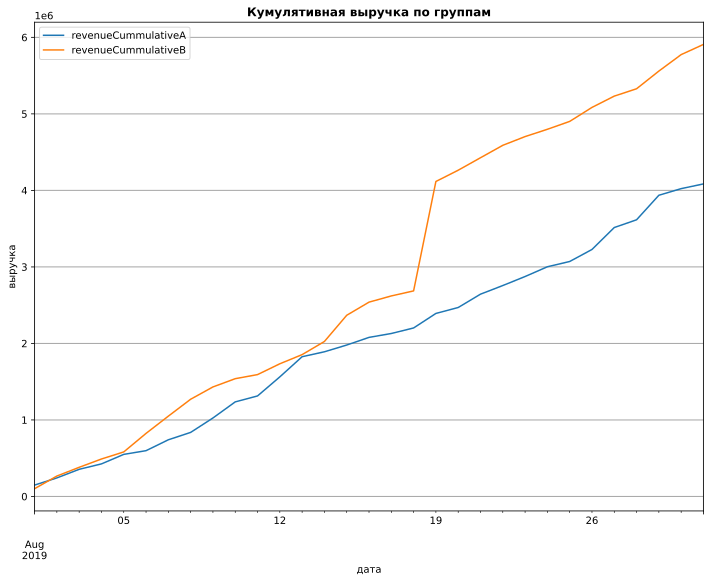

In [16]:
# на основе сводной таблицы строим график кумулятивной выручки по группам
data[['date','revenueCummulativeA', 'revenueCummulativeB']]\
.plot(x = 'date', title = "Кумулятивная выручка по группам")\
.set(xlabel = 'дата', ylabel = 'выручка');

На графике видно, что выручка группы B стабильно выше, чем у группы А, особенно во второй половине месяца. У группы произошёл резкий скачок 18-19 августа, несмотря на то, что 13 августа показатели сравнялись. Сильный всплеск выручки вызван, скорее всего, крупными заказами, потому что без них графики примерно одинаковы. Может быть, что в эти даты был наплыв покупателей...

In [17]:
# посмотрим медианную выручку заказов 19 августа в группе В
print('Медиана одного заказа 19 августа =', order.query(' date == "2019-08-19" ')['revenue'].median())

Медиана одного заказа 19 августа = 2630.0


In [18]:
# получим заказы 18-19 августа в группе В
order.query(' "2019-08-17" <= date <= "2019-08-20" ').sort_values(by='revenue', ascending=False).head()

,transaction_id,visitor_id,date,revenue,group
425,590470918,1920142716,2019-08-19,1294500.0,B
530,3970235543,2912540959,2019-08-19,43990.0,A
751,348143148,689129267,2019-08-20,37150.0,B
527,1570513684,2837914161,2019-08-19,33405.0,B
421,3765974140,1357170471,2019-08-19,31680.0,A


Найдена аномалия в группе B 19 августа: один заказ № 425 на сумму почти 1,3 млн руб., что в 492 раза больше медианного значения по всей группе за эту дату (2630 руб.). Только этот заказ принес почти треть дневной выручки от всей группы, когда остальные заказы принесли меньше 44 тыс. руб. Этот заказ можно считать выбросом, что учитывать в дальнейшем исследовании.

### <a name="8_2"></a>График кумулятивного среднего чека по группам
[К содержанию](#2)

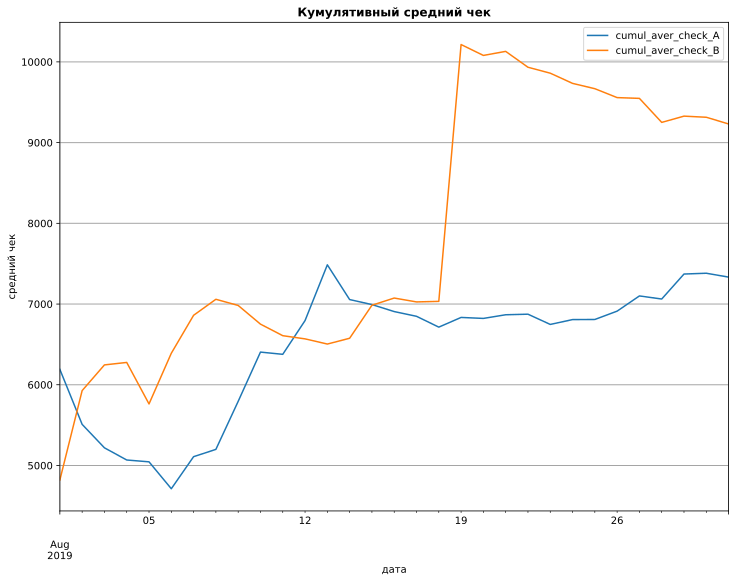

In [19]:
data['cumul_aver_check_A'] = data['revenueCummulativeA'] / data['orderCummulativeA']
data['cumul_aver_check_B'] = data['revenueCummulativeB'] / data['orderCummulativeB']
data[['date','cumul_aver_check_A', 'cumul_aver_check_B']]\
.plot(x = 'date', title = "Кумулятивный средний чек")\
.set(xlabel = 'дата', ylabel = 'средний чек');

Этот график похож на график кумулятивной выручки: видно сильное влияние большого заказа № 425 от 19 августа. Кстати, после него средний чек в группе B постепенно пошёл на снижение, а в группе A с 18 августа виден плавный прирост.<br>
В то же время в начале месяца в группе B чек всё равно был больше, хотя в определённые даты наоборот, чек был выше в группе A, например 1 августа и 12-14 августа, когда в группе В с 11 по 15 августа размер чека снизился.

### <a name="8_3"></a>График относительного изменения кумулятивного среднего чека группы B к группе A
[К содержанию](#2)

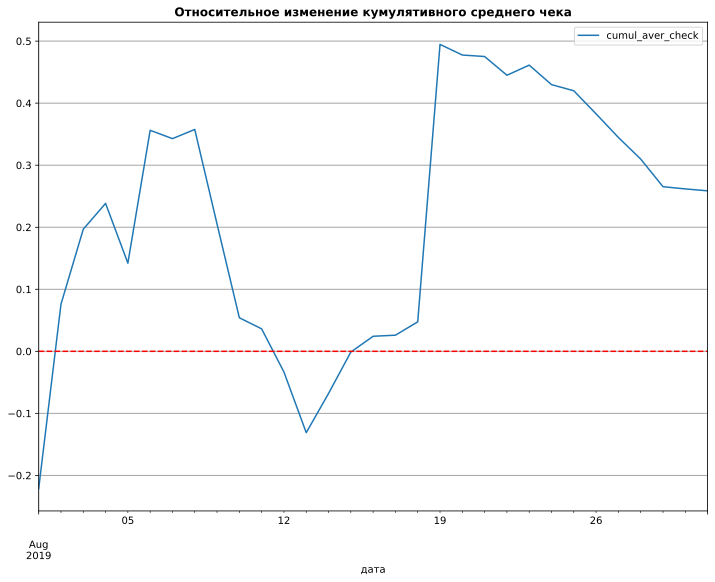

In [20]:
# из новых колонок посчитаем относительное изменение кумулятивного среднего чека группы B к группе A
data['cumul_aver_check'] = data['cumul_aver_check_B'] / data['cumul_aver_check_A']-1
data[['date','cumul_aver_check']]\
.plot(x = 'date',title = "Относительное изменение кумулятивного среднего чека")\
.set(xlabel = 'дата');
plt.axhline(y=0, color='red', linestyle='--');

Это график показывает, что группа B нестабильна: её кумулятивный средний чек увеличивался до 8 августа, после чего начала падать до 13 августа, причем три дня - 12-14 августа - средний чек группы A был больше по сравненю с группой B. Однако с 13 августа чек B возобновил рост и с 15 августа превышал группу A до конца месяца, несмотря на сокращение с 20 августа. При этом видно, что 19 августа был сильный всплеск за счет заказа № 425 с аномально большой суммой.<br>
Этот график говорит, что кумулятивная выручка группы В всё-таки больше, чем у группы А, несмотря на нестабильность. Возможно, здесь большую роль играют аномальные выбросах в обеих группах.

### <a name="8_4"></a>График кумулятивного среднего количества заказов на посетителя по группам
[К содержанию](#2)

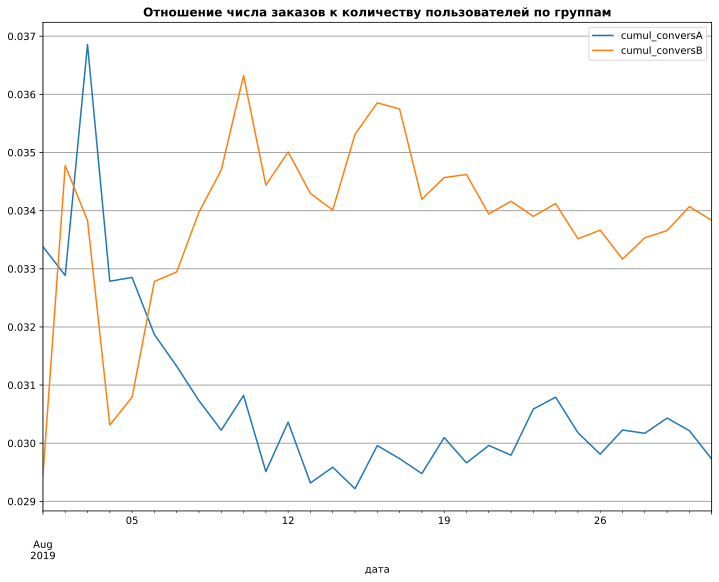

In [21]:
# дбавим в сводную таблицу колонку отношения числа заказов на посетителя по группам
# введём переменные cumul_conversA и cumul_conversB для заказов в сегментах A и B соответственно
data['cumul_conversA'] = data['orderCummulativeA'] / data['visitCummulativeA']
data['cumul_conversB'] = data['orderCummulativeB'] / data['visitCummulativeB']
data[['date','cumul_conversA', 'cumul_conversB']]\
.plot(x = 'date', title = "Отношение числа заказов к количеству пользователей по группам")\
.set(xlabel = 'дата');

В начале августа кумулятивное среднее количество заказов на посетителя, особенно с 1 по 5 августа, в группе A существенно превышало группу В, показав 3 августа максимальное значение за весь период. Но после этого пика началось резкое снижение, а с 10 августа - стагнация в минимальном коридоре 0,029-0,031.<br>
В тоже время по группе B с 4 августа виден рост, который превысил группу A уже 6 августа и продолжался до 10 августа к отметке выше 0,036. Однако затем, после всплесков 15 и 17 августа, начлось постепенное снижение показателя.<br>
Несмотря на это, можно сделать вывод, что в группе B в целом конверсия посетителей в заказчиков существенно выше группы A, а после 6 августа - стабильно выше.

### <a name="8_5"></a>График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A
[К содержанию](#2)

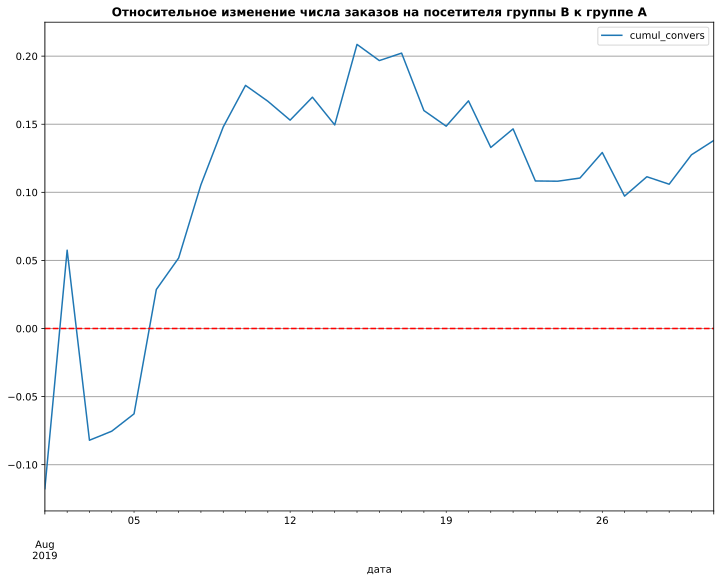

In [22]:
# из введённых ранее переменных cumul_conversA и cumul_conversB сосздадим новую колонку
data['cumul_convers'] = data['cumul_conversB'] / data['cumul_conversA']-1
data[['date','cumul_convers']]\
.plot(x = 'date', title = "Относительное изменение числа заказов на посетителя группы B к группе A")\
.set(xlabel = 'дата');
plt.axhline(y=0, color='red', linestyle='--');

Этот график подтверждает полученые результаты: с 1 по 5 авгста группа A на 5-10% превышала группу В, правда, 2 августа здесь выбивается - на 5%. Хотя 2-3 августа отмечался скачок конверсии в обеих группах, может быть, на фоне какой-нибудь маркетинговой акции.<br>
Однако уже с 6 августа и  до конца месяца группа B была впереди, её конверсия росла до середины августа, когда разница с показателями группы A была на максимальной отметке 21%. Затем началось постепенное снижение показателя до стагнации в коридоре 10-14%.

### <a name="8_6"></a>Точечный график количества заказов по пользователям
[К содержанию](#2)

Здесь нужно объявить новые переменные по группам А и В для данных по пользователям и количеству заказов каждого, кто оплатил хоть один заказ.

In [23]:
# по группе А
order_userA = order.query('group == "A"').groupby('visitor_id', as_index=False)['transaction_id'].count()
order_userA.columns = ['visitor_id', 'order_count']
print('Минимальное в группе А количество заказов:', order_userA['order_count'].min())
print('Маскимальное количество заказов на пользователя:', order_userA['order_count'].max())
print('Количество платящих пользователей в группе А:', len(order_userA))
print('Число заказов пользователей в группе А:', order_userA['order_count'].sum())
display(order_userA.tail())

Минимальное в группе А количество заказов: 1
Маскимальное количество заказов на пользователя: 7
Количество платящих пользователей в группе А: 503
Число заказов пользователей в группе А: 557


,visitor_id,order_count
498,4243832526,1
499,4256040402,7
500,4259830713,1
501,4266935830,1
502,4278982564,1


In [24]:
# по группе В
order_userB = order.query('group == "B"').groupby('visitor_id',as_index=False)['transaction_id'].count()
order_userB.columns = ['visitor_id', 'order_count']
print('Минимум заказов в группе B:', order_userB['order_count'].min())
print('Маскимум на пользователя в группе B заказов:', order_userB['order_count'].max())
print('Количество платящих пользователей в группе В:', len(order_userB))
print('Число заказов пользователей в группе:', order_userB['order_count'].sum())
display(order_userB.tail())

Минимум заказов в группе B: 1
Маскимум на пользователя в группе B заказов: 6
Количество платящих пользователей в группе В: 586
Число заказов пользователей в группе: 640


,visitor_id,order_count
581,4258103007,1
582,4266935830,1
583,4279090005,1
584,4281247801,1
585,4283872382,1


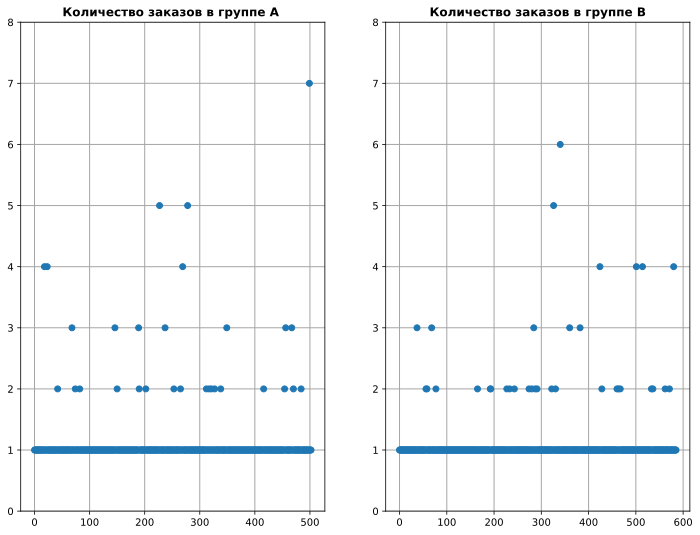

In [25]:
# стрим графики по обеим группам
plt.subplot(1, 2, 1)
x_values = pd.Series(range(0,len(order_userA)))
plt.scatter(x_values, order_userA['order_count']) 
plt.title("Количество заказов в группе А ")
plt.ylim(0,8)

plt.subplot(1, 2, 2)
x_values = pd.Series(range(0,len(order_userB)))
plt.scatter(x_values, order_userB['order_count'] ) 
plt.title("Количество заказов в группе В")
plt.ylim(0,8)

plt.show()

На диаграмме рассеяния видно, что в обеих группах больше всего пользователей сделали по одному заказу. Существенно меньше тех, кто сделал по два и три заказа. Совсем мало пользователей с 4-7 заказами. При этом считать их выбросами без расчёта процентилей 95 и 99 нельзя. Хотя можно сказать, что все пользователи с тремя и более заказами - аномальны.

### <a name="8_7"></a>Расчёт 95-го и 99-го перцентилей количества заказов на пользователя
[К содержанию](#2)

Здесь нужно выбрать границу для определения аномальных пользователей.

In [46]:
# возьмём общие данные
order_by_user = order.drop(['group', 'revenue', 'date'], axis=1)\
.groupby('visitor_id', as_index=False)\
.agg({'transaction_id' : pd.Series.nunique})
order_by_user.columns = ['user_id','orders']
order_by_user.sort_values(by='orders',ascending=False).head(10)
print('95-й и 99-й перцентили по всем заказам:', np.percentile(order_by_user['orders'], [95, 99]))

95-й и 99-й перцентили по всем заказам: [2. 4.]


На 95-й отметке у пользователей по 2 заказа, на 99-й отметке уже по 4 закза на каждого. Надо посмотреть подробнее.

In [45]:
# напишем цикл для расчёта всех перцентилей
percentiles = [95, 96, 97, 98, 99]
for p in percentiles:
    result = np.percentile(order_by_user['orders'], p)
    print(f'Перцентиль {p}-й по заказам: {result}')

Перцентиль 95-й по заказам: 2.0
Перцентиль 96-й по заказам: 2.0
Перцентиль 97-й по заказам: 2.0
Перцентиль 98-й по заказам: 3.0
Перцентиль 99-й по заказам: 4.0


Здесь видно, что 98% пользователей делают 1 или 2 заказа. Значит можно принять за аномалии пользователей в обеих группах, у которых 3 заказа и более, что уберёт не более 3% от всех данных.

### <a name="8_8"></a>Точечный график стоимостей заказов
[К содержанию](#2)

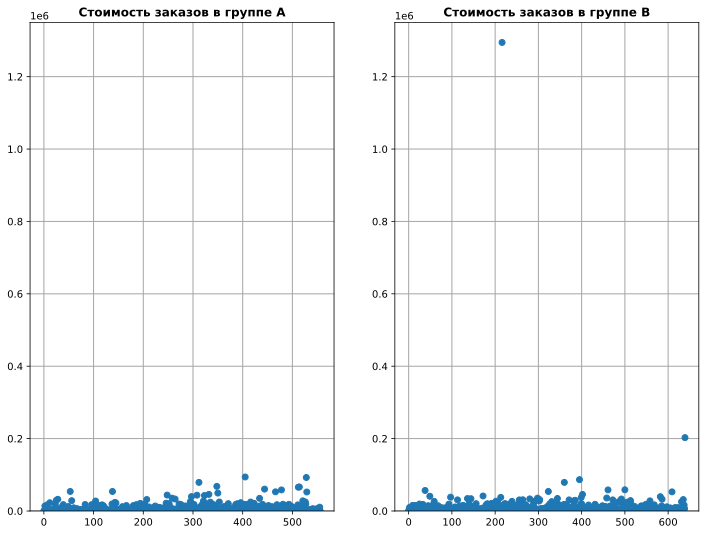

In [27]:
# определим новые переменные
revenue_orderA = order.query('group == "A"')['revenue']
revenue_orderB = order.query('group == "B"')['revenue']
# построим графики
plt.subplot(1, 2, 1)
x_values = pd.Series(range(0, len(revenue_orderA)))
plt.scatter(x_values, revenue_orderA)
plt.title("Стоимость заказов в группе А")
plt.ylim(0, 1350000)

plt.subplot(1, 2, 2)
x_values = pd.Series(range(0, len(revenue_orderB)))
plt.scatter(x_values, revenue_orderB) 
plt.title("Стоимость заказов в группе В")
plt.ylim(0, 1350000)
plt.show()

Хорошо выделяются аномальный заказ № 425 около 1.3 млн руб. и еще один на отметке около 200 тыс. руб. Все остальные заказы по стоимости не больше 100 тыс. руб.<br>
Для наглядности ограничим график, убрав явные выбросы в revenue больше 100 000 в каждой группе.

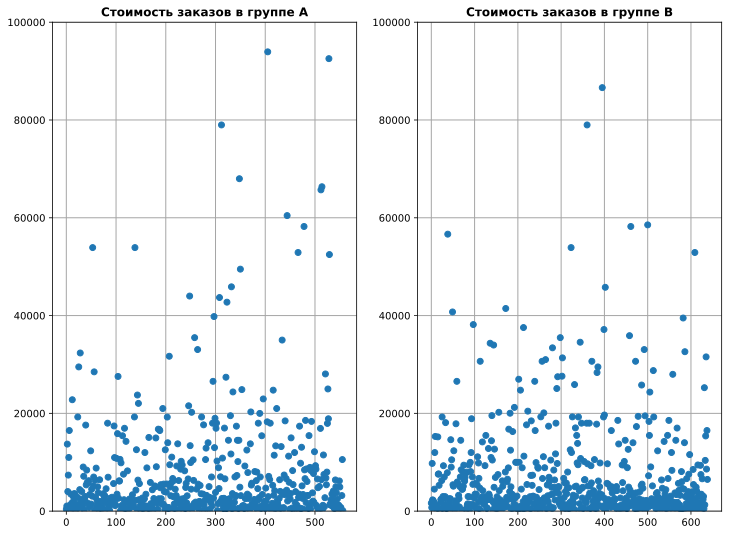

In [28]:
# определим новые переменные
revenue_orderA = order.query('group == "A"')['revenue']
revenue_orderB = order.query('group == "B"')['revenue']
# построим графики
plt.subplot(1, 2, 1)
x_values = pd.Series(range(0, len(revenue_orderA)))
plt.scatter(x_values, revenue_orderA)
plt.title("Стоимость заказов в группе А")
plt.ylim(0, 100000)
# сократим до 100000
plt.subplot(1, 2, 2)
x_values = pd.Series(range(0, len(revenue_orderB)))
plt.scatter(x_values, revenue_orderB) 
plt.title("Стоимость заказов в группе В")
plt.ylim(0, 100000)
plt.show()

На этом графике видно, что у абсолютного большинства пользователей в обеих группах сумма заказа не превышает 10 тыс. рублей, а предел на 100 тыс. руб. В целом, без анамалий, группы очень похожи. Чтобы найти более точную границу аномальных заказов нужно рассчитать процентили.

### <a name="8_9"></a>Расчёт 95-го и 99-го перцентилей стоимости заказов
[К содержанию](#2)

Также выбираем границу для определения аномальных заказов.

In [49]:
# на общих данных получим все перцентили по суммам заказов
percentiles = [95, 96, 97, 98, 99]
for p in percentiles:
    result = np.percentile(order['revenue'], p)
    print(f'Перцентиль {p}-й по выручке: {result:.2f}')

Перцентиль 95-й по выручке: 28000.00
Перцентиль 96-й по выручке: 31382.00
Перцентиль 97-й по выручке: 35485.00
Перцентиль 98-й по выручке: 44133.20
Перцентиль 99-й по выручке: 58233.20


Здесь видно, что 98% заказов меньше 44 тыс. руб., а 95% - меньше 28 тыс. руб. То есть можно принять за аномалии в обеих группах пользователей с суммой заказа больше 27000 руб., что уберёт из данных до 5% пользователей с дорогими заказами.

### <a name="8_10"></a>Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным
[К содержанию](#2)

Нам понадобяться новые переменные sampleA и sampleB (есть в теории), в которых будут данные по количеству заказов пользователей. Пользователям без заказов назначим нули для проверки критерием Манна-Уитни.

In [30]:
# возьмём из сводной таблицы список с количеством заказов для каждого пользователя и нули для пустых пользователей
sampleA = pd.concat([
                     order_userA['order_count'],
                     pd.Series(0, index=np.arange(data['visitPerDateA'].sum() - len(order_userA['order_count'])),
                     name='order_count')
                     ],axis=0)

sampleB = pd.concat([
                     order_userB['order_count'],
                     pd.Series(0, index=np.arange(data['visitPerDateB'].sum() - len(order_userB['order_count'])),
                     name='order_count')
                    ],axis=0)

Теперь сформулируем гипотезы:
- Н0: статистически значимых различий в конверсии между группами нет
- Н1: статистически значимые различия в конверсии между группами есть

Используем критерий Манна-Уитни, уровень статистической значимости 0,05

In [31]:
#расчет p-value критерия Манна-Уитни
print("p-value равен {0:.3f}".format(st.mannwhitneyu(sampleA, sampleB, True, 'two-sided')[1]))

#расчет относительного изменения конверсии клиента группы В относительно группы А
print("Относительный показатель группы B и A равен {0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

p-value равен 0.017
Относительный показатель группы B и A равен 0.138


По "сырым" данным значение p-value 0.017 меньше принятого уровня альфа, значит "нулевую" гипотезу, что различий в конверсии между группами нет, отвергаем. Относительная разница (превышение) в конверсии группы В над А составляет 13,8%.

### <a name="8_11"></a>Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным
[К содержанию](#2)

Для рассчёта статистической значимости различий в среднем чеке между группами используем mannwhitneyu() с данными о выручке с заказов, и найдём относительные различия в среднем чеке между группами.<br>
Сформулируем гипотезы:
* Н0: статистически значимых различий в среднем чеке заказа между группами нет
* Н1: статистически значимые различия в среднем чеке заказа между группами есть

Применим тест Манна-Уитни, уровень статистической значимости 0,05.

In [32]:
#тест Манна-Уитни
print("p-value равен {0:.3f}".format(st.mannwhitneyu(order[order['group']=='A']['revenue'], order[order['group']=='B']['revenue'], True, 'two-sided')[1]))

#относительные различия суммы среднего чека
print("Относительный показатель различий между А и В {0:.3f}".format(order[order['group']=='B']['revenue'].mean() / order[order['group']=='A']['revenue'].mean()-1)) 

p-value равен 0.729
Относительный показатель различий между А и В 0.259


Здесь показатель P-value сильно больше 0.05, а значит, нет причин отвергать нулевую гипотезу. То есть средние чеки по "сырым" данным в обеих группах похожи. При этом средний чек группы B сильно больше - на 26% - среднего чека группы A.

### <a name="8_12"></a>Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным
[К содержанию](#2)

Вспомним об аномальных пользователях по сумме заказа на 95-м и 99-м процентилях:
- для группы А: 26718 и 62764.4 рублей
- для группы В: 28787.45 55579.06 рублей

По количеству заказов на одного пользователя соответственно:
- для группы А: 2 и 4 заказа на пользователя
- для группы В: 2 и 3 заказа на пользователя

Аномальными мы определили пользователей в группе А с тремя и более заказами и суммами выше 27000 руб., в группе В тоже с тремя заказами или суммой заказа больше 29000 руб.<br>
Сделаем срезы пользователей с числом заказов больше двух — user_order_count, пользователей с превышающей суммой по группам — user_order_exp, и объединим их в новой таблице - anomal_users, разделив на группы. Затем методом shape() узнаем, сколько всего аномальных пользователей.

In [33]:
#для группы А
user_order_countA = order_userA[order_userA['order_count'] > 2]['visitor_id']
user_order_expA = order[order['revenue'] > 27000]['visitor_id']
anomal_usersA = (pd.concat([user_order_countA, user_order_expA], axis=0)
    .drop_duplicates()
    .sort_values())
print(anomal_usersA.head(10))
print('Аномальных пользователей в группе A:', anomal_usersA.shape)

568     113298937
1099    148427295
18      199603092
928     204675465
23      237748145
684     358944393
648     382846391
1189    393266494
68      611059232
751     689129267
Name: visitor_id, dtype: uint64
Аномальных пользователей в группе A: (73,)


In [34]:
#для группы В
user_order_countB = order_userB[order_userB['order_count'] > 2]['visitor_id']
user_order_expB = order[order['revenue'] > 29000]['visitor_id']
anomal_usersB = (pd.concat([user_order_countB, user_order_expB], axis=0)
    .drop_duplicates()
    .sort_values())
print(anomal_usersB.head(10))
print('Аномальных пользователей в группе В:',anomal_usersB.shape) 

1099    148427295
928     204675465
37      249864742
684     358944393
648     382846391
1189    393266494
68      457167155
751     689129267
1137    759473111
77      787824685
Name: visitor_id, dtype: uint64
Аномальных пользователей в группе В: (61,)


Проверим, как действия аномальных пользователей влияют на результаты теста. Расчитаем статистическую значимость различий в конверсии между группами теста по "очищенным" данным.

In [35]:
# cначала соберём выборки количества заказов по пользователям по группам
sampleA_filtr = pd.concat([order_userA[
    np.logical_not(order_userA['visitor_id'].isin(anomal_usersA))]['order_count'],
    pd.Series(0, index=np.arange(
        data['visitPerDateA'].sum() - len(order_userA['order_count'])),
              name='order_count',),],axis=0,)
sampleB_filtr = pd.concat([order_userB[
    np.logical_not(order_userB['visitor_id'].isin(anomal_usersB))]['order_count'],
    pd.Series(0, index=np.arange(
        data['visitPerDateB'].sum() - len(order_userB['order_count'])),
              name='order_count',),],axis=0,)

Применим Манна-Уитни к полученным срезам с "очищенными" от выбросов данными. Назначим гипотезы:
- Н0: статистически значимых различий в конверсии между группами нет
- Н1: статистически значимые различия в конверсии между группами есть

Уровень статистической значимости 0,05.

In [36]:
print("p-value равен {0:.3f}".format(st.mannwhitneyu(sampleA_filtr, sampleB_filtr, True, 'two-sided')[1]))
print("Относительный показатель различия групп B и A составляет {0:.3f}".format(sampleB_filtr.mean() / sampleA_filtr.mean()-1)) 

p-value равен 0.009
Относительный показатель различия групп B и A составляет 0.185


На "очищенных" данных p-value равен 0.009 (на "сырых" был 0,017), что меньше уровня статистической значимости, а значит нулевую гипотезу отвергаем. Разница между группами составила 18.5%, то есть на такой объём конверсия группы В больше конверсии группы А. Ранее, на "сырых" данных  различие составляло 13.8%, то есть результаты мало изменились по сравнению с "сырыми" данными.

### <a name="8_13"></a>Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным
[К содержанию](#2)

Гипотезы:
* Н0: статистически значимых различий в среднем чеке заказа между группами нет
* Н1: статистически значимые различия в среднем чеке заказа между группами есть

Уровень статистической значимости 0,05

Создадим общую таблицу аномальных пользователей, а порогом примем 28000 руб, среднее между 27000 в группе А и 29000 в группе В.

In [54]:
# создадим датафрейм с общими данными
user_order = pd.concat([order_userA[order_userA['order_count'] > 2]['visitor_id'],
                        order_userB[order_userB['order_count'] > 2]['visitor_id']], axis = 0)
user_order_exp = order[order['revenue'] > 28000]['visitor_id']
anomal_users = pd.concat([user_order, user_order_exp], axis = 0).drop_duplicates().sort_values()
print(anomal_users.head(5))
print("Всего аномальных пользователей", len(anomal_users)) 

1099    148427295
18      199603092
928     204675465
23      237748145
37      249864742
Name: visitor_id, dtype: uint64
Всего аномальных пользователей 74


In [60]:
# из общих данных получим нужные значения
print("alpha =",0.05)
print("Р-value равен {0:.3f}".format(st.mannwhitneyu(
    order[np.logical_and(order['group']=='A',
    np.logical_not(order['visitor_id'].isin(anomal_users)))]['revenue'],
    order[np.logical_and(order['group']=='B',
    np.logical_not(order['visitor_id'].isin(anomal_users)))]['revenue'], alternative = 'two-sided')[1]))

print("Относительный показатель различий B от A равен {0:.3f}".format(order[
    np.logical_and(order['group']=='B',
    np.logical_not(order['visitor_id'].isin(anomal_users)))]['revenue'].mean() / 
    order[np.logical_and(order['group']=='A',
    np.logical_not(order['visitor_id'].isin(anomal_users)))]['revenue'].mean() - 1)) 

alpha = 0.05
Р-value равен 0.738
Относительный показатель различий B от A равен -0.020


В среднем чеке на "oчищенных" общих данных p-value равен 0.738 (было 0.729 на "сырых" данных), это больше уровня статистической значимости alpha. Значит нулевую гипотезу не отвергаем - различий в среднем чеке между группами нет.<br>
При этом средний чек в группе B оказался на 2% меньше среднего чека по группе A, тогда как на "сырых" данных он был больше на 26%. Такая разница из-за единственного аномального заказа № 425 на 1,3 млн руб.

### <a name="8_14"></a>ПРОМЕЖУТОЧНЫЙ ВЫВОД
[К содержанию](#2)<br><br>
По результатам А/В-тестирования можно сделать выводы:
* кумулятивная выручка группы В стабильно выше выручки группы А, даже с учётом всплеска 19 августа;
* сравнение кумулятивных средних чеков между группами не дало однозначного результата: график группы В нестабильный, но всё равно больше группы А;
* кумулятивная конверсия группы В стабильно больше по сравнению с группой А, Хотя и наблюдается небольшое снижение.
 
В обеих группах подавляющее большинство пользователей делали по одному заказу, некоторые — по два, и очень мало — по 3-7. Сумма заказа в обеих группах в основном не превышает 10 тыс. руб., а предельная сумма не выше 100 тыс. руб. При этом  в группе В есть один аномально большой заказ на сумму 1 294 500 руб., что является причиной резкого всплеска показателя кумулятивного среднего чека группы В 19 августа. В остальном обе группы очень похожи.<br>
Расчёт статистической значимости различий в конверсии и в сумме среднего чека между группами по "сырым" и "очищенным" от выбросов данным показал, что:<br>
* тесты с использованием критерия Манна-Уитни позволили отвергнуть гипотезу о равенстве конверсии между группами, относительная разница конверсии группы В на 13.8% больше по сравнению с группой А. Тестирование на "очищенных" от аномалий данных этот результат подтвердило: относительное превышение конверсии в группе В над группой А составило 18.5%.
* после удаления выбросов (в группе В только один заказ на сумму 1.29 млн руб.) с очень большой долей вероятности подтверждена гипотеза, что различий в сумме среднего чека между группами нет, относительное различие среднего чека между группами составило 2.1% против 25.8% на "сырых" данных. То есть разница между средними чеками в обеих группах стремится к нулю.

Варианты решений:
1. Остановить тест, зафиксировать победу одной из групп.
2. Остановить тест, зафиксировать отсутствие различий между группами.

3. Продолжить тест.

## <a name="9"></a>ОБЩИЕ ВЫВОДЫ
[К содержанию](#2)<br><br>
Из девяти подготовленных гипотез с применением фреймворка RICE наиболее приоритетной является гипотеза 2 "Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа". На втором месте с учётом охвата наиболее приоритетной стала гипотеза 7 "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок".<br>
Cумма среднего чека различается между группами незначительно. Конверсия и дополнительная выручка от неё в перспективе у группы В выше на 13-19% по сравнению с группой А, но различия носят затухающий характер.<br>
<br>
__РЕКОМЕНДАЦИИ:__
Тест признать успешным и остановить. Можно зафиксировать отсутствие различий между группами по сумме среднего чека. Признать победу за группой В из-за превышения конверсии.